In [3]:
from lib import plot
import IPython
import numpy as np
from random import randint, randrange, choice as randchoice

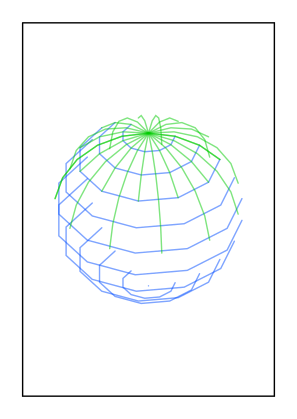

In [4]:
a = plot.A6_PORTRAIT
p_svg = plot.SVGPlotter('plots/globe.svg', a)
p_hpgl = plot.HPGLPlotter(a, 'plots/globe_{index}.hpgl')
p = plot.MultiPlotter()
p.register_plotter(p_svg)
p.register_plotter(p_hpgl)
dia = np.min(a.size()) * 0.75

def transform(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    
    proj = np.array([[1, 0],
        [0, 0.8],
        [-0.0, 1.1]])
    proj /= np.linalg.norm(proj, axis=0, keepdims=True)
    return dia / 2 * proj.T @ [x, y, z] + a.centre()

p.move_to(a.bottom_left())
p.line_to(a.bottom_right())
p.line_to(a.top_right())
p.line_to(a.top_left())
p.line_to(a.bottom_left())

p.add_layer([0, 0.3, 1, 0.5])

theta_range = np.linspace(0, np.pi, 12)
phi_range = np.linspace(0, 2 * np.pi, 12)
phi_offset = randchoice(phi_range)
for theta in theta_range:
    phi_offset += phi_range[0]
    p.move_to(transform(1, theta, phi_range[0] + phi_offset))
    for phi in phi_range[1:8]:
        p.line_to(transform(1, theta, phi + phi_offset))

p.add_layer([0, 0.8, 0, 0.5])

theta_offset = randchoice(theta_range)
for phi in phi_range:
    theta_offset +=theta_range[0]
    p.move_to(transform(1, theta_range[0] + theta_offset, phi))
    for theta in theta_range[1:9]:
        p.line_to(transform(1, theta + theta_offset, phi))

p.finalise()

IPython.display.SVG(filename=p_svg.file_name)